In [63]:
!pip install gdown
import pandas as pd
import gdown

url = 'https://drive.google.com/uc?id=1-WZKE5xHw-3m_SL_PtOgwkzdFROIWqih'
output = 'reviews.csv'
gdown.download(url, output, quiet=False)

raw_df = pd.read_csv('reviews.csv')
# We'll start with a small subset of our data to test things out, then we'll add more
df = raw_df[raw_df['Score'] > 0][:10000]
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading...
From: https://drive.google.com/uc?id=1-WZKE5xHw-3m_SL_PtOgwkzdFROIWqih
To: /content/reviews.csv
100%|██████████| 301M/301M [00:01<00:00, 240MB/s]


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Score'])

In [65]:
# X_train[0], y_train[0]

In [66]:
# Keras
from tensorflow.keras.preprocessing.text import Tokenizer

VOCAB_SIZE = 10000

tokenizer = Tokenizer(num_words=VOCAB_SIZE)

tokenizer.fit_on_texts(X_train)

In [67]:
X_train_enc = tokenizer.texts_to_sequences(X_train)
X_test_enc = tokenizer.texts_to_sequences(X_test)

print(X_train[0])
print(X_train_enc[0])

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
[18, 97, 1251, 2802, 142, 1651, 9841, 60, 557, 2, 43, 17, 3272, 2802, 12, 259, 1803, 12, 244, 2459, 26, 2, 134, 273, 62, 33, 8, 174, 17, 26, 126, 2, 89, 17, 574, 64, 66, 67, 2571, 15, 12, 9, 829, 2, 89, 231, 2572, 6, 8, 1313, 131, 5, 1346, 7410, 16, 254, 878, 4, 174, 402, 14, 1220, 417, 903, 82, 80, 41, 173, 367, 1580, 7, 140, 2682, 58, 81, 15, 81, 8, 403, 25, 2802]


In [68]:
import numpy as np
review_lengths = [len(t) for t in X_train_enc]
np.mean(review_lengths)

77.2016

(array([6.781e+03, 5.940e+02, 8.200e+01, 2.800e+01, 5.000e+00, 6.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   9. ,  154.8,  300.6,  446.4,  592.2,  738. ,  883.8, 1029.6,
        1175.4, 1321.2, 1467. ]),
 <a list of 10 Patch objects>)

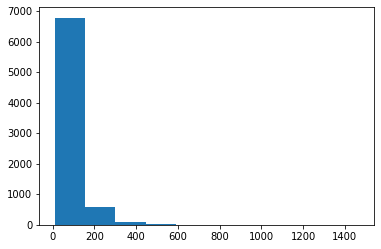

In [69]:
import matplotlib.pyplot as plt

plt.hist(review_lengths)

In [70]:

from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LEN = 100

X_train_enc = pad_sequences(X_train_enc, maxlen=MAX_LEN, padding="post")
X_test_enc = pad_sequences(X_test_enc, maxlen=MAX_LEN, padding="post")

np.mean([len(t) for t in X_train_enc])

100.0

In [71]:
from tensorflow.keras.utils import to_categorical

y_train_enc = to_categorical(y_train)

print(y_train.iloc[0:10])
print(y_train_enc[0:10])

1023    5
6639    4
714     5
3896    5
3580    5
8398    5
6096    5
320     5
9948    5
712     5
Name: Score, dtype: int64
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [79]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalMaxPool1D, Conv1D

EMBEDDING_DIMENSION = 50

model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIMENSION, input_length=MAX_LEN))
model.add(Conv1D(50, 4, 1, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 50)           500000    
                                                                 
 conv1d_2 (Conv1D)           (None, 97, 50)            10050     
                                                                 
 dropout (Dropout)           (None, 97, 50)            0         
                                                                 
 global_max_pooling1d_5 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_7 (Dense)             (None, 6)                 306       
                                                                 
Total params: 510,356
Trainable params: 510,356
Non-trainable params: 0
_______________________________________________

In [76]:
history = model.fit(
    X_train_enc,
    y_train_enc,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
)

Epoch 1/30
106/106 [==============================] - 3s 24ms/step - loss: 1.3042 - accuracy: 0.6003 - val_loss: 1.2116 - val_accuracy: 0.5893
Epoch 2/30
106/106 [==============================] - 2s 22ms/step - loss: 1.0861 - accuracy: 0.6213 - val_loss: 1.0821 - val_accuracy: 0.5893
Epoch 3/30
106/106 [==============================] - 2s 22ms/step - loss: 0.9251 - accuracy: 0.6556 - val_loss: 0.9540 - val_accuracy: 0.6387
Epoch 4/30
106/106 [==============================] - 2s 22ms/step - loss: 0.7615 - accuracy: 0.7280 - val_loss: 0.8964 - val_accuracy: 0.6600
Epoch 5/30
106/106 [==============================] - 2s 23ms/step - loss: 0.6076 - accuracy: 0.7973 - val_loss: 0.8742 - val_accuracy: 0.6720
Epoch 6/30
106/106 [==============================] - 2s 23ms/step - loss: 0.4637 - accuracy: 0.8624 - val_loss: 0.8734 - val_accuracy: 0.6827
Epoch 7/30
106/106 [==============================] - 2s 23ms/step - loss: 0.3388 - accuracy: 0.9175 - val_loss: 0.9019 - val_accuracy: 0.6773

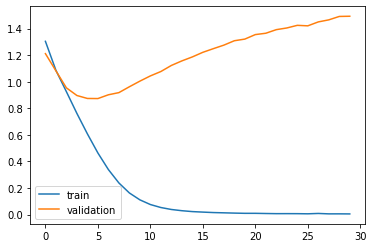

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.show()

In [80]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalMaxPool1D, Conv1D, Dropout

EMBEDDING_DIMENSION = 50

model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIMENSION, input_length=MAX_LEN))
model.add(Conv1D(50, 4, 1, activation='relu'))
model.add(Dropout(0.5))
model.add(GlobalMaxPool1D())
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 50)           500000    
                                                                 
 conv1d_3 (Conv1D)           (None, 97, 50)            10050     
                                                                 
 dropout_1 (Dropout)         (None, 97, 50)            0         
                                                                 
 global_max_pooling1d_6 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 6)                 306       
                                                                 
Total params: 510,356
Trainable params: 510,356
Non-trainable params: 0
_______________________________________________

In [81]:
history = model.fit(
    X_train_enc,
    y_train_enc,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
)

Epoch 1/30
106/106 [==============================] - 5s 34ms/step - loss: 1.3053 - accuracy: 0.5849 - val_loss: 1.3264 - val_accuracy: 0.5893
Epoch 2/30
106/106 [==============================] - 3s 26ms/step - loss: 1.1008 - accuracy: 0.6216 - val_loss: 1.2120 - val_accuracy: 0.5973
Epoch 3/30
106/106 [==============================] - 3s 26ms/step - loss: 0.9628 - accuracy: 0.6422 - val_loss: 1.1070 - val_accuracy: 0.6267
Epoch 4/30
106/106 [==============================] - 3s 26ms/step - loss: 0.8310 - accuracy: 0.6969 - val_loss: 1.0442 - val_accuracy: 0.6587
Epoch 5/30
106/106 [==============================] - 3s 33ms/step - loss: 0.7092 - accuracy: 0.7479 - val_loss: 0.9909 - val_accuracy: 0.6680
Epoch 6/30
106/106 [==============================] - 3s 32ms/step - loss: 0.5903 - accuracy: 0.7948 - val_loss: 0.9505 - val_accuracy: 0.6720
Epoch 7/30
106/106 [==============================] - 3s 26ms/step - loss: 0.4773 - accuracy: 0.8416 - val_loss: 0.9351 - val_accuracy: 0.6720

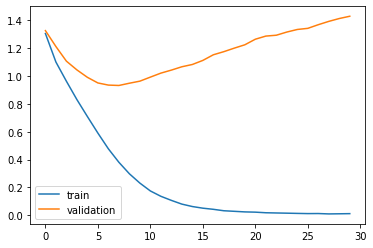

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.show()

# Now we solve all our problems with more data

In [88]:
X_train, X_test, y_train, y_test = train_test_split(raw_df['Text'], raw_df['Score'])
VOCAB_SIZE = 10000

tokenizer = Tokenizer(num_words=VOCAB_SIZE)

tokenizer.fit_on_texts(X_train)

X_train_enc = tokenizer.texts_to_sequences(X_train)
X_test_enc = tokenizer.texts_to_sequences(X_test)


X_train_enc = pad_sequences(X_train_enc, maxlen=MAX_LEN, padding="post")
X_test_enc = pad_sequences(X_test_enc, maxlen=MAX_LEN, padding="post")

np.mean([len(t) for t in X_train_enc])

y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)
print(y_train.iloc[0:10])
print(y_train_enc[0:10])

241824    5
174241    5
48535     4
51859     5
228179    4
423417    4
37458     1
292259    5
318935    3
37215     5
Name: Score, dtype: int64
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [89]:
EMBEDDING_DIMENSION = 50

model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIMENSION, input_length=MAX_LEN))
model.add(Conv1D(50, 4, 1, activation='relu'))
model.add(Dropout(0.5))
model.add(GlobalMaxPool1D())
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 50)           500000    
                                                                 
 conv1d_5 (Conv1D)           (None, 97, 50)            10050     
                                                                 
 dropout_3 (Dropout)         (None, 97, 50)            0         
                                                                 
 global_max_pooling1d_8 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_10 (Dense)            (None, 6)                 306       
                                                                 
Total params: 510,356
Trainable params: 510,356
Non-trainable params: 0
_______________________________________________

In [92]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('my_min_loss_model.h5', monitor='val_loss', verbos=1, save_best_only=True, mode='min')

history = model.fit(
    X_train_enc,
    y_train_enc,
    epochs=10,
    batch_size=4096, # powers of 2
    validation_split=0.1,
    callbacks = [mc]
)

Epoch 1/2
94/94 [==============================] - 102s 1s/step - loss: 0.8227 - accuracy: 0.7009 - val_loss: 0.9169 - val_accuracy: 0.7153
Epoch 2/2
94/94 [==============================] - 99s 1s/step - loss: 0.7401 - accuracy: 0.7261 - val_loss: 0.8573 - val_accuracy: 0.7327


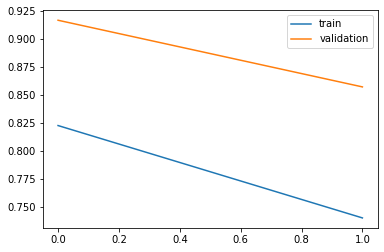

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.show()

In [94]:
model.evaluate(X_test_enc, y_test_enc)

4442/4442 [==============================] - 15s 3ms/step - loss: 0.8606 - accuracy: 0.7313


[0.8606002330780029, 0.7313143014907837]

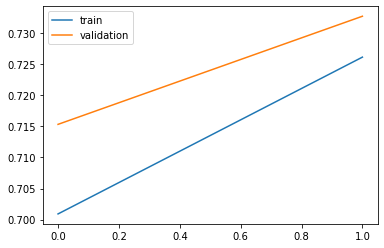

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'])
plt.show()